### 1. Description of the problem

 The problem at hand is to develop a predictive machine learning model that can accurately determine the likelihood of customers churning from Expresso, an African telecommunications company. Customer churn, defined as customers becoming inactive and not making any transactions for 90 days, presents challenges in revenue loss and customer satisfaction. By accurately predicting churn, this model equips Expresso with the means to proactively address the risk of customer attrition, reduce costs associated with acquiring new customers, and enhance customer relationships, thereby increasing the quality of service and overall competitiveness in the telecommunications industry.



In [ ]:
#Import some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Loading and spliting the data

At this step, we read the data from the file and create 2 variables:

`df` - the main data (X)

`y` - target


In [ ]:
df = pd.read_csv('Train.csv')
y = df['CHURN']
df.drop(columns=['CHURN'],inplace = True)

In [ ]:
df

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54.0,On net 200F=Unlimited _call24H,8.0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17.0,On-net 1000F=10MilF;10d,1.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62.0,"Data:1000F=5GB,7d",11.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11.0,Mixt 250F=Unlimited_call24H,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130761,0f9e0e4da55b4c224fb9a69376de574abe138c4d,TAMBACOUNDA,K > 24 month,3400.0,8.0,3399.0,1133.0,9.0,0.0,137.0,40.0,NaN,NaN,NaN,NO,58.0,MIXT:500F= 2500F on net _2500F off net;2d,3.0
130762,0f9e14f1c569b6e2d785624a0236419f6c034342,THIES,K > 24 month,750.0,4.0,750.0,250.0,5.0,219.0,1.0,8.0,NaN,NaN,NaN,NO,11.0,On net 200F=Unlimited _call24H,2.0
130763,0f9e21a4e24bf5c1f010894c125269b04a8fbaf9,NaN,K > 24 month,2700.0,13.0,2749.0,916.0,15.0,602.0,0.0,49.0,NaN,NaN,NaN,NO,21.0,"Data: 100 F=40MB,24H",10.0
130764,0f9e224a409741f504ffa29804c2458e902bf9c5,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,778.0,7.0,NaN,NaN,NaN,NaN,NO,12.0,NaN,NaN


In [ ]:
y

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
130761    0.0
130762    0.0
130763    0.0
130764    0.0
130765    NaN
Name: CHURN, Length: 130766, dtype: float64

## 3. Data processing

###### 3.1 Fill NaN values in `y` with 0

In [ ]:
y.value_counts()

0.0    106283
1.0     24482
Name: CHURN, dtype: int64

In [ ]:
y = y.fillna(0)

###### 3.2 Сalculating the percentage of NaN values in `df`

In [ ]:
precent_missing = (df.isna().sum() / df.shape[0])*100
precent_missing###### 3.1 Fill Nan values in `y` with 0

user_id            0.000000
REGION            39.468210
TENURE             0.000765
MONTANT           35.141398
FREQUENCE_RECH    35.141398
REVENUE           33.715951
ARPU_SEGMENT      33.715951
FREQUENCE         33.715951
DATA_VOLUME       49.119802
ON_NET            36.497255
ORANGE            41.620146
TIGO              59.735711
ZONE1             92.109570
ZONE2             93.577077
MRG                0.000765
REGULARITY         0.000765
TOP_PACK          41.833504
FREQ_TOP_PACK     41.833504
dtype: float64

###### 3.3 Droping columns with a lot of NaN data ("ZONE1","ZONE2") and unnecessary data ('user_id','REVENUE','TENURE','DATA_VOLUME')

In [ ]:
df.drop(["ZONE1","ZONE2",'user_id','REVENUE','TENURE','DATA_VOLUME'], axis =1 , inplace = True)

In [ ]:
df

,REGION,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,FATICK,4250.0,15.0,1417.0,17.0,388.0,46.0,1.0,NO,54.0,On net 200F=Unlimited _call24H,8.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4.0,NaN,NaN
2,NaN,3600.0,2.0,340.0,2.0,90.0,46.0,7.0,NO,17.0,On-net 1000F=10MilF;10d,1.0
3,DAKAR,13500.0,15.0,4501.0,18.0,41.0,102.0,2.0,NO,62.0,"Data:1000F=5GB,7d",11.0
4,DAKAR,1000.0,1.0,328.0,1.0,39.0,24.0,NaN,NO,11.0,Mixt 250F=Unlimited_call24H,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
130761,TAMBACOUNDA,3400.0,8.0,1133.0,9.0,137.0,40.0,NaN,NO,58.0,MIXT:500F= 2500F on net _2500F off net;2d,3.0
130762,THIES,750.0,4.0,250.0,5.0,1.0,8.0,NaN,NO,11.0,On net 200F=Unlimited _call24H,2.0
130763,NaN,2700.0,13.0,916.0,15.0,0.0,49.0,NaN,NO,21.0,"Data: 100 F=40MB,24H",10.0
130764,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NO,12.0,NaN,NaN


###### 3.4 Filling NaN values with 'REGION_Unknown' in `REGION`

In [ ]:
for col in ['REGION']:

    df[col].fillna(col+'_Unknown',inplace = True)

###### 3.5 Filling NaN values with means for all numerical data

In [ ]:
df.dtypes == 'float64'

REGION            False
MONTANT            True
FREQUENCE_RECH     True
ARPU_SEGMENT       True
FREQUENCE          True
ON_NET             True
ORANGE             True
TIGO               True
MRG               False
REGULARITY         True
TOP_PACK          False
FREQ_TOP_PACK      True
dtype: bool

In [ ]:
float_data = df.columns[df.dtypes == 'float64'].tolist()

In [ ]:
for col in float_data:
    df[col].fillna(df[col].mean(), inplace = True)

In [ ]:
df

,REGION,MONTANT,FREQUENCE_RECH,ARPU_SEGMENT,FREQUENCE,ON_NET,ORANGE,TIGO,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK
0,FATICK,4250.000000,15.000000,1417.000000,17.000000,388.000000,46.000000,1.000000,NO,54.000000,On net 200F=Unlimited _call24H,8.000000
1,REGION_Unknown,5587.206643,11.633193,1851.685338,14.089366,279.083345,95.487877,23.108163,NO,4.000000,NaN,9.345521
2,REGION_Unknown,3600.000000,2.000000,340.000000,2.000000,90.000000,46.000000,7.000000,NO,17.000000,On-net 1000F=10MilF;10d,1.000000
3,DAKAR,13500.000000,15.000000,4501.000000,18.000000,41.000000,102.000000,2.000000,NO,62.000000,"Data:1000F=5GB,7d",11.000000
4,DAKAR,1000.000000,1.000000,328.000000,1.000000,39.000000,24.000000,23.108163,NO,11.000000,Mixt 250F=Unlimited_call24H,2.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
130761,TAMBACOUNDA,3400.000000,8.000000,1133.000000,9.000000,137.000000,40.000000,23.108163,NO,58.000000,MIXT:500F= 2500F on net _2500F off net;2d,3.000000
130762,THIES,750.000000,4.000000,250.000000,5.000000,1.000000,8.000000,23.108163,NO,11.000000,On net 200F=Unlimited _call24H,2.000000
130763,REGION_Unknown,2700.000000,13.000000,916.000000,15.000000,0.000000,49.000000,23.108163,NO,21.000000,"Data: 100 F=40MB,24H",10.000000
130764,REGION_Unknown,5587.206643,11.633193,1851.685338,14.089366,7.000000,95.487877,23.108163,NO,12.000000,NaN,9.345521


###### 3.6 Dropping `MRG` (contains only "NO")

In [ ]:
df.MRG.value_counts()

NO    130765
Name: MRG, dtype: int64

In [ ]:
df.drop('MRG', axis=1,inplace =True)

###### 3.7 Filling NaN values with 'TOP_PACK_Unknown' in `TOP_PACK`

In [ ]:
df['TOP_PACK'].value_counts()

All-net 500F=2000F;5d              19221
On net 200F=Unlimited _call24H      9281
Data:490F=1GB,7d                    6984
Data: 100 F=40MB,24H                5269
Mixt 250F=Unlimited_call24H         4186
                                   ...  
Data_EVC_2Go24H                        1
IVR Echat_Monthly_500F                 1
All-net 500= 4000off+4000on;24H        1
FNF_Youth_ESN                          1
Data:1000F=700MB,7d                    1
Name: TOP_PACK, Length: 98, dtype: int64

In [ ]:
for col in ['TOP_PACK']:
    df[col].fillna(col+'_Unknown',inplace = True)

In [ ]:
df.TOP_PACK

0                    On net 200F=Unlimited _call24H
1                                  TOP_PACK_Unknown
2                           On-net 1000F=10MilF;10d
3                                 Data:1000F=5GB,7d
4                       Mixt 250F=Unlimited_call24H
                            ...                    
130761    MIXT:500F= 2500F on net _2500F off net;2d
130762               On net 200F=Unlimited _call24H
130763                         Data: 100 F=40MB,24H
130764                             TOP_PACK_Unknown
130765                             TOP_PACK_Unknown
Name: TOP_PACK, Length: 130766, dtype: object

###### 3.8 Check if we have NaN values

In [ ]:
df.isna().sum()

REGION            0
MONTANT           0
FREQUENCE_RECH    0
ARPU_SEGMENT      0
FREQUENCE         0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
dtype: int64

In [ ]:
y.isna().sum()

0

## 4. Data visualization

###### 4.1 Visualization via seaborn.pairplot

In [ ]:
numerical_columns = df.select_dtypes(include='number')
numerical_columns = [col for col in numerical_columns if df[col].nunique() > 2]
print(numerical_columns)
print("Number of numerical columns:",len(numerical_columns))

['MONTANT', 'FREQUENCE_RECH', 'ARPU_SEGMENT', 'FREQUENCE', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY', 'FREQ_TOP_PACK']
Number of numerical columns: 9


In [ ]:
df['y'] = y

The fraction of '1' values in the dataset (indicates the customer churned)

In [ ]:

count_ones = (y == 1).sum()
total_samples = len(df)
fraction_of_ones = count_ones / total_samples

print("Fraction of '1' values in the dataset (accepted deposits):", fraction_of_ones.round(3))


Fraction of '1' values in the dataset (accepted deposits): 0.187


Distribution of Target Variable (y)

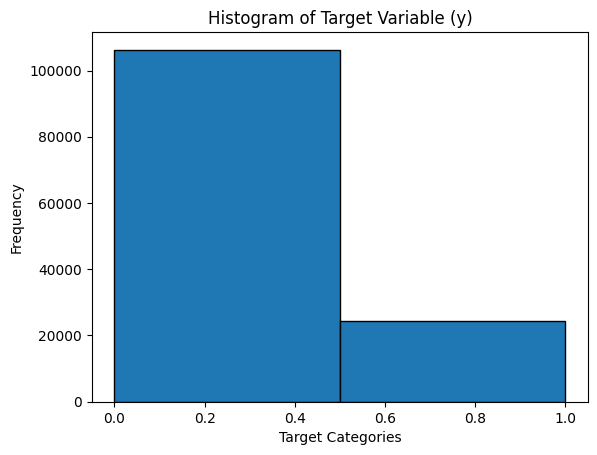

In [ ]:
import matplotlib.pyplot as plt


# Create a histogram
plt.hist(df['y'], bins=[0, 0.5, 1], edgecolor='k')  # 'y' is your target variable, specify the bin edges

# Add labels and title
plt.xlabel('Target Categories')
plt.ylabel('Frequency')
plt.title('Histogram of Target Variable (y)')

# Show the histogram
plt.show()


<Figure size 2000x1500 with 0 Axes>

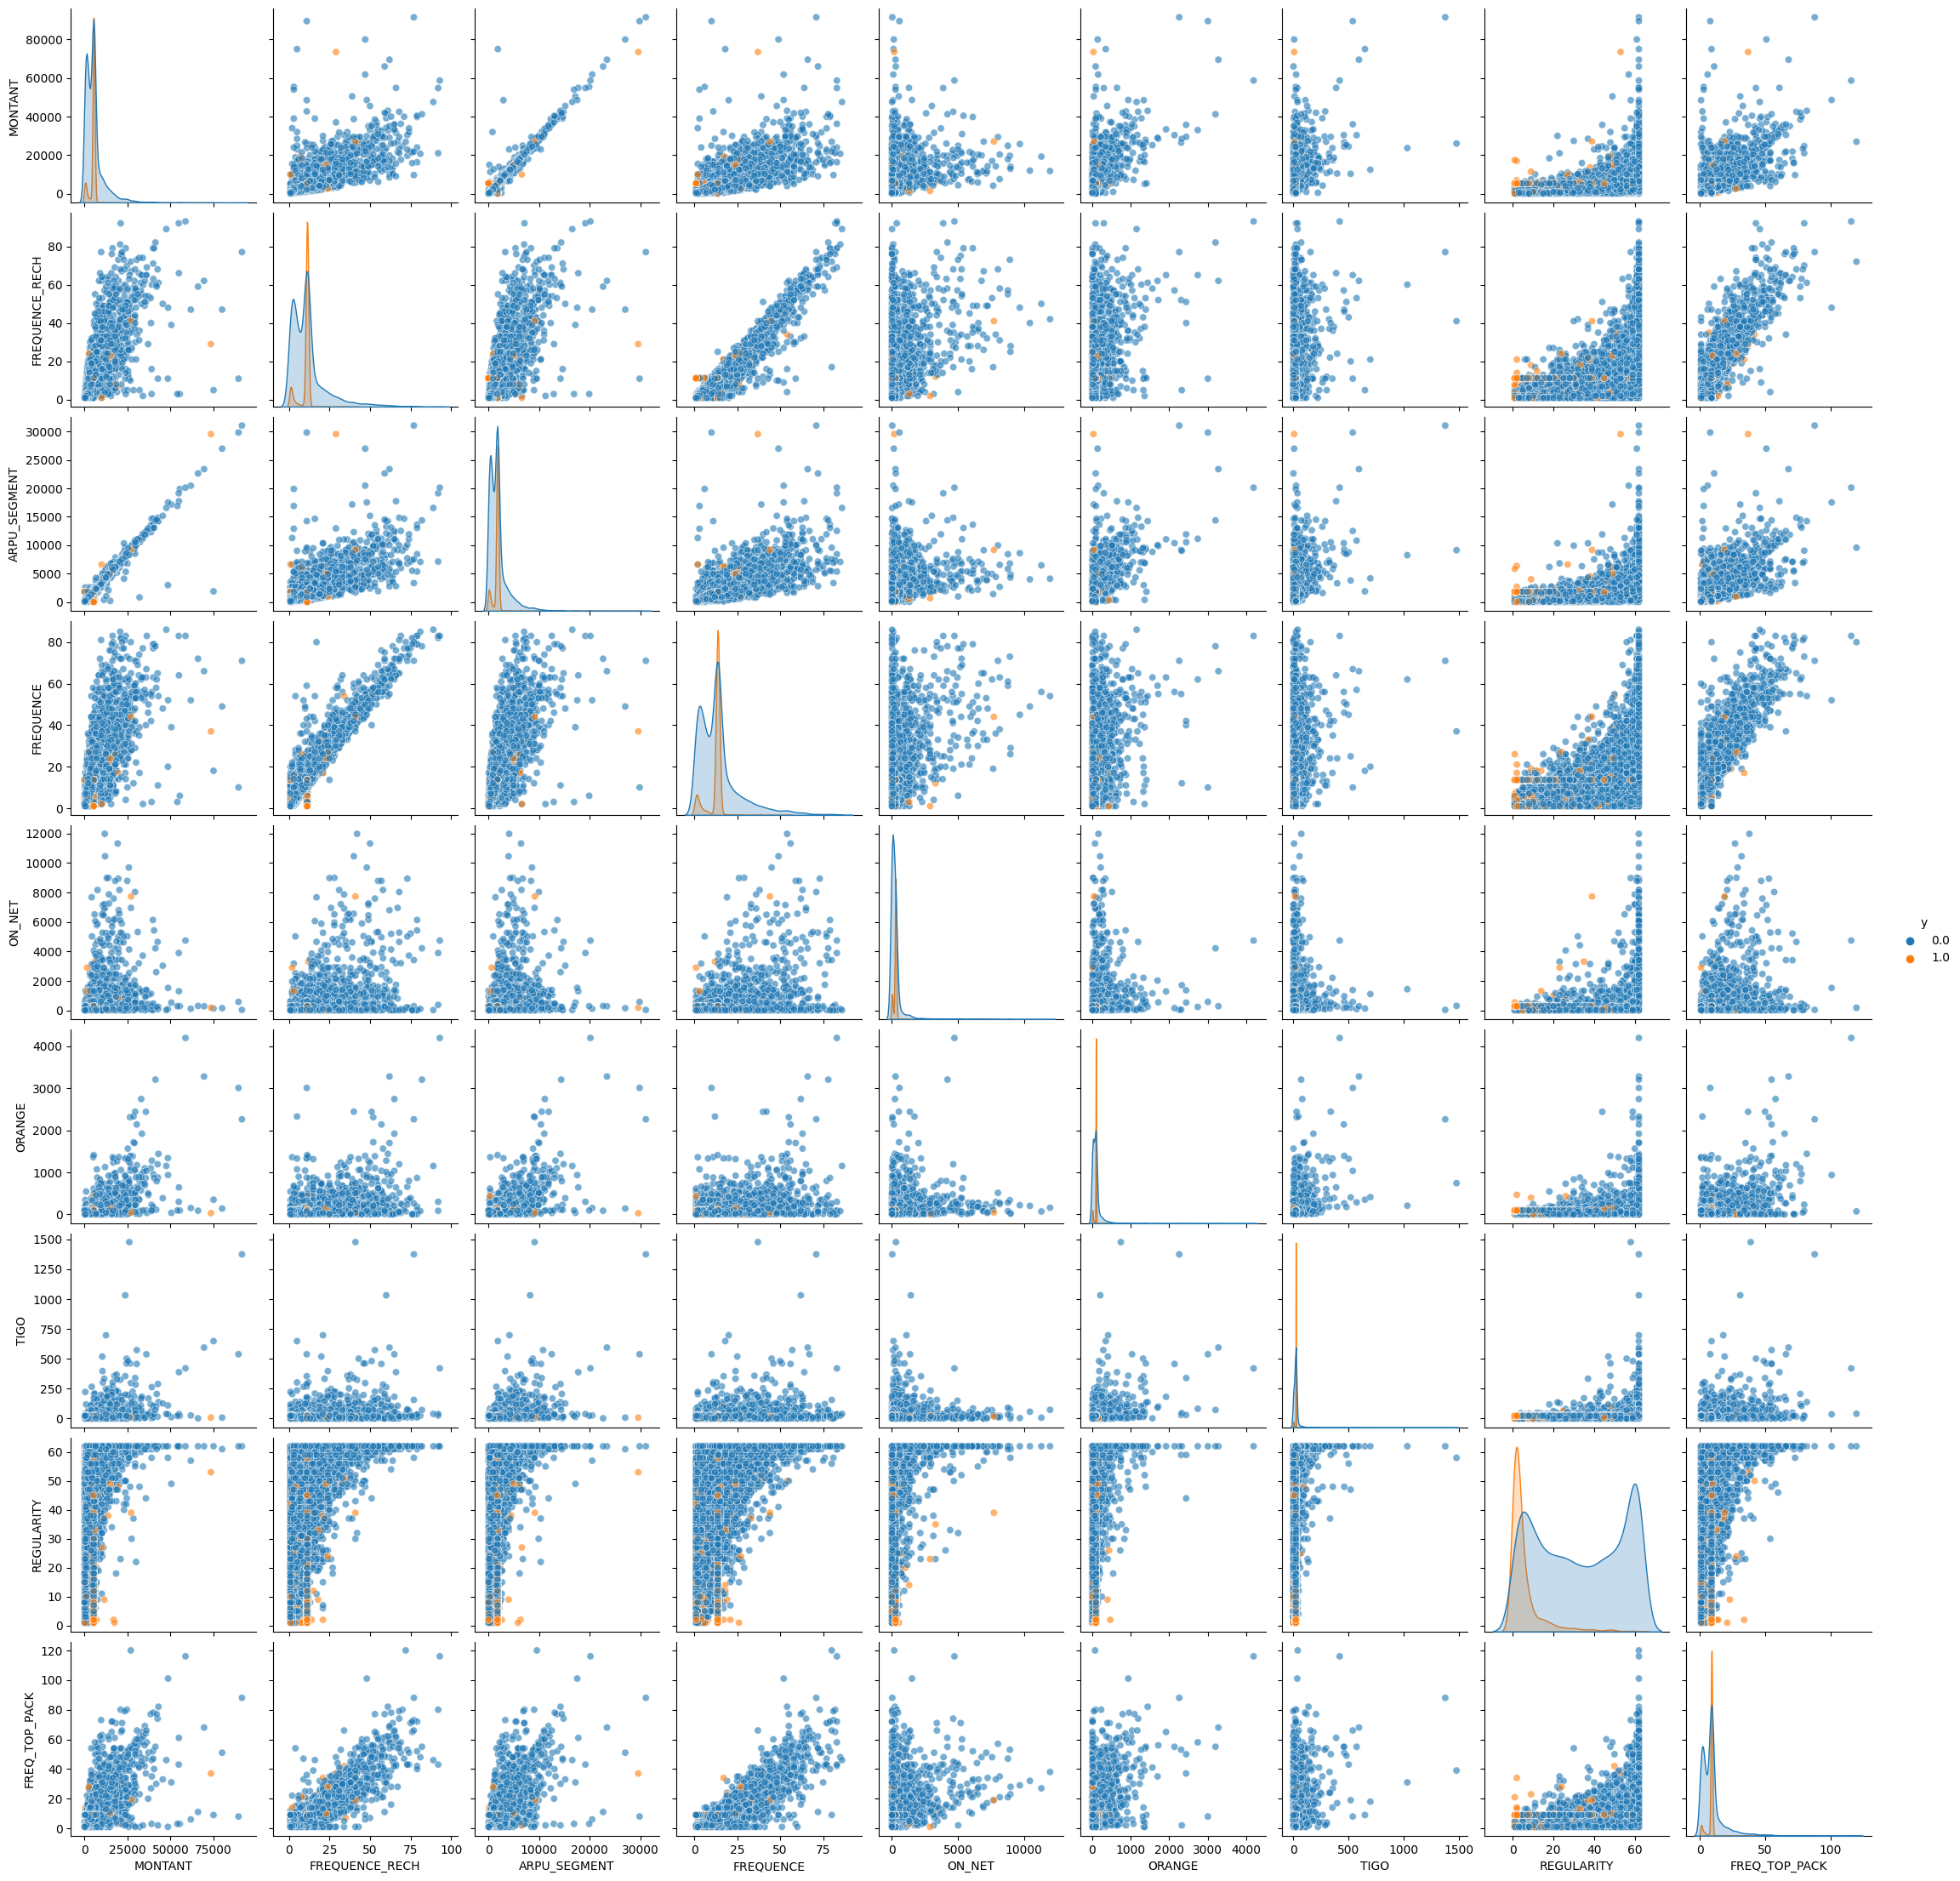

In [ ]:
plt.figure(figsize=(20,15))
sns.pairplot(df, hue="y", vars=numerical_columns, plot_kws={"alpha": 0.6}, kind='scatter')
plt.show()

In [ ]:
df.drop("y", axis =1, inplace=True)

###### 4.2 Correlation via seaborn.heatmap

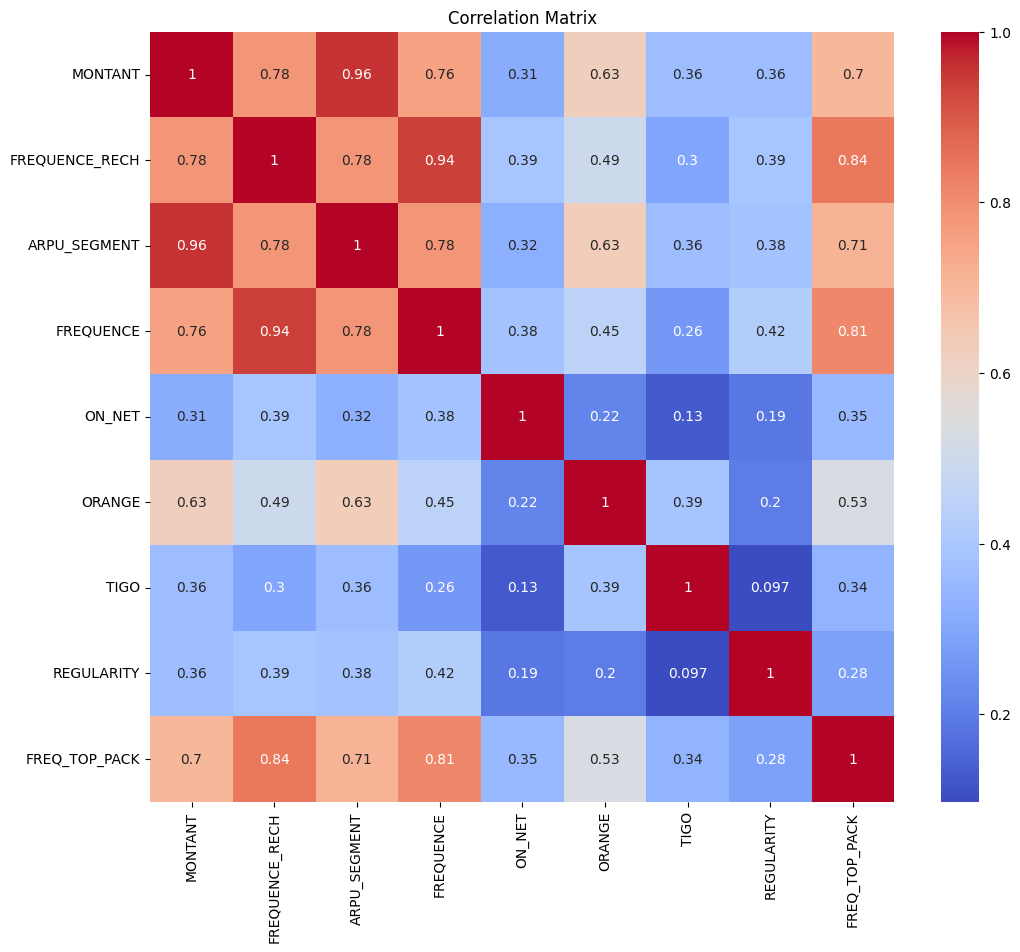

In [ ]:
plt.figure(figsize=(12, 10))  # Set the figure size (width, height)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 5. Building ML models

###### 5.1 Splitting the data into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

###### 5.2 Encode categorical variables with one-hot encoding

In [ ]:
pip install category_encoders

In [ ]:
from category_encoders import OneHotEncoder
from sklearn.linear_model import LogisticRegression

encoder = OneHotEncoder(cols=['REGION', 'TOP_PACK'], use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)

In [ ]:
X_test_encoded = encoder.transform(X_test)

In [ ]:
categorical_columns = X_train_encoded.select_dtypes(include=['object']).columns
print(categorical_columns)

Index([], dtype='object')


###### 5.3 Train the logistic regression model

In [ ]:
log_reg_model = LogisticRegression(max_iter=400, penalty='l2')
log_reg_model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=400)

In [ ]:
y_pred = log_reg_model.predict(X_test_encoded)
from sklearn.metrics import accuracy_score
accuracy_LR = accuracy_score(y_test, y_pred)
print(f'accuracy_score of LogisticRegression: {accuracy_LR}')

accuracy_score of LogisticRegression: 0.8695037088017129


###### 5.4 Finging best parametrs of the logistic regression model

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters ={'C': np.logspace(-2, 4, 7)}
cv = GridSearchCV(log_reg_model, parameters)
cv.fit(X_train_encoded, y_train)
best_C = cv.best_params_['C']
print("Best C is:", best_C)

Best C is: 0.01


In [ ]:
# Create a new logistic regression model with the best 'C' value
best_log_reg_model = LogisticRegression(max_iter=400, penalty='l2', C=best_C)

# Fit the model on the training data
best_log_reg_model.fit(X_train_encoded, y_train)

# Make predictions on the testing data
y_pred = best_log_reg_model.predict(X_test_encoded)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the testing data:", accuracy)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print("Balanced_accuracy:", balanced_accuracy)

Accuracy on the testing data: 0.8700389997705896
Balanced_accuracy: 0.8273578105068377


###### 5.5 Finging important features of the logistic regression model

In [ ]:
# Get feature importances from the trained logistic regression model
feature_names = X_train_encoded.columns
importances = np.abs(best_log_reg_model.coef_[0])

# Create a DataFrame with feature names and importances
importances_df = pd.DataFrame({'Attribute': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)
print(importances_df.head(3))



               Attribute  Importance
0  REGION_REGION_Unknown    1.690605
2           REGION_DAKAR    0.748473
3           REGION_THIES    0.264001


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'y_train' and 'y_test'
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

###### 5.6 Building ROC plot

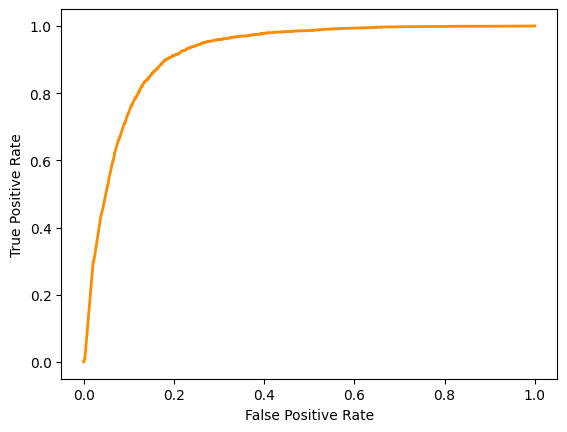

ROC-AUC is: 0.9191206887033267


In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_log_reg_model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)


roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

print("ROC-AUC is:",roc_auc)

###### 5.7 Creating  xgboost model

**Code below was used to find the optimal hyperparameter for xgb model** 🙂

In [ ]:
# from sklearn.model_selection import StratifiedKFold

# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 4, 5],
#     'min_child_weight': [1, 2, 3],
# }

# # Create an XGBoost classifier
# xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# # Define the cross-validation strategy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_encoded, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)

# # Train the model with the best hyperparameters
# best_xgb_model = xgb.XGBClassifier(objective='binary:logistic', **best_params)
# best_xgb_model.fit(X_train_encoded, y_train)

# # Make predictions on the test data
# y_pred = best_xgb_model.predict(X_test_encoded)

# # Calculate accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy on the test data:", accuracy)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
Accuracy on the test data: 0.8737142857142857


In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, balanced_accuracy_score
# Create an XGBoost classifier with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=3,
    n_estimators=100,
    random_state=42  # You can specify a random seed for reproducibility
)

# Fit the model on your training data
best_xgb_model.fit(X_train_encoded, y_train)

# Make predictions on the test data
y_pred = best_xgb_model.predict(X_test_encoded)

balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
xgb_roc_auc = roc_auc_score(y_test, best_xgb_model.predict_proba(X_test_encoded)[:, 1])
xgb_accuracy = accuracy_score(y_test, y_pred)

print(f'XGBoost Balanced Accuracy: {balanced_accuracy:.3f}')
print(f'XGBoost Accuracy: {xgb_accuracy:.3f}')
print(f'XGBoost ROC AUC: {xgb_roc_auc:.3f}')


XGBoost Balanced Accuracy: 0.787
XGBoost Accuracy: 0.876
XGBoost ROC AUC: 0.928


**Building ROC plot**

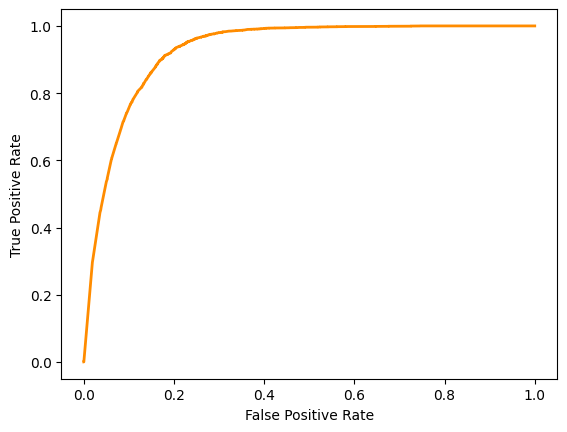

ROC-AUC is: 0.9283403757951749


In [ ]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = best_xgb_model.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_encoded, y_pred_proba)


roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

print("ROC-AUC is:",roc_auc)

###### 5.6 Creating  RandomForestClassifier model

**Code below was used to find the optimal hyperparameter for RandomForest model** 🙂

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer

# # Define your parameter grid
# param_grid = {
#     'max_depth': [2, 4, 6],
#     'n_estimators': [50, 100, 200]
# }

# # Assuming you have already encoded your data into X_train_encoded and X_test_encoded
# # Create a RandomForestClassifier
# classifier = RandomForestClassifier(random_state=42)

# # Create the GridSearchCV object with the classifier and parameter grid
# grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# # Fit the grid search on the encoded training data
# grid_search.fit(X_train_encoded, y_train)

# # Get the best hyperparameters
# best_max_depth = grid_search.best_params_['max_depth']
# best_n_estimators = grid_search.best_params_['n_estimators']

# print(f"Optimal Depth: {best_max_depth}")
# print(f"Optimal Number of Trees: {best_n_estimators}")

Optimal Depth: 6
Optimal Number of Trees: 200


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a new Random Forest Classifier with the optimal hyperparameters
final_classifier = RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

# Fit the classifier on your training data
final_classifier.fit(X_train_encoded, y_train)

# You can then evaluate the model on your test data (if available)
# For example, if you have test data and want to calculate accuracy
accuracy = final_classifier.score(X_test_encoded, y_test)
print(f"Accuracy on test data: {accuracy}")
rg_roc_auc = roc_auc_score(y_test, final_classifier.predict_proba(X_test_encoded)[:, 1])
print(f"ROC-AUC on test data: {accuracy}")
# Or, if you want to make predictions
y_pred = final_classifier.predict(X_test_encoded)

Accuracy on test data: 0.8740919171063699
ROC-AUC on test data: 0.8740919171063699


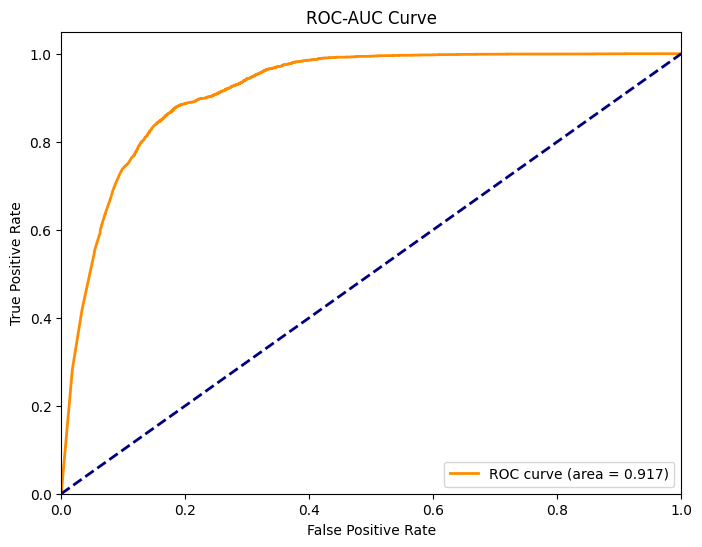

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class
y_pred_prob = final_classifier.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and ROC area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


###### 5.7 Creating  CatBoostClassifier model

**Code below was used to find the optimal hyperparameter for CatBoost model** 🙂

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.model_selection import GridSearchCV

# # Define the hyperparameters and their possible values
# param_grid = {
#     'iterations': [100, 200, 300],
#     'depth': [4, 6, 8],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'l2_leaf_reg': [1, 3, 5],
# }

# # Create a CatBoost classifier
# catboost_model = CatBoostClassifier(loss_function='Logloss', verbose=0, random_state=42)

# # Create a GridSearchCV object with the model and parameter grid
# grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, scoring='roc_auc', cv=5)

# # Fit the grid search to your data
# grid_search.fit(X_train_encoded, y_train)

# # Get the best hyperparameters
# best_params = grid_search.best_params_
# best_roc_auc = grid_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best ROC-AUC:", best_roc_auc)


Best Hyperparameters: {'depth': 6, 'iterations': 100, 'l2_leaf_reg': 5, 'learning_rate': 0.1}
Best ROC-AUC: 0.9300643732033755


In [ ]:
from catboost import CatBoostClassifier

# Create a CatBoost classifier with the best hyperparameters
catboost_model = CatBoostClassifier(
    iterations=100,
    depth=6,
    learning_rate=0.1,
    l2_leaf_reg=5,
    loss_function='Logloss',
    verbose=200,
    random_state=42
)

# Train the model on your training data
catboost_model.fit(X_train_encoded, y_train)

catboost_pred = catboost_model.predict(X_test_encoded)

# Calculate accuracy
catboost_accuracy = accuracy_score(y_test, catboost_pred)

# Calculate ROC AUC
catboost_roc_auc = roc_auc_score(y_test, catboost_model.predict_proba(X_test_encoded)[:, 1])

print(f'CatBoost Accuracy: {catboost_accuracy:.3f}')
print(f'CatBoost ROC AUC: {catboost_roc_auc:.3f}')


0:	learn: 0.5520026	total: 48.2ms	remaining: 4.77s
99:	learn: 0.2510622	total: 4.38s	remaining: 0us
CatBoost Accuracy: 0.876
CatBoost ROC AUC: 0.929


0:	learn: 0.5520026	total: 24ms	remaining: 2.37s
99:	learn: 0.2510622	total: 3.09s	remaining: 0us


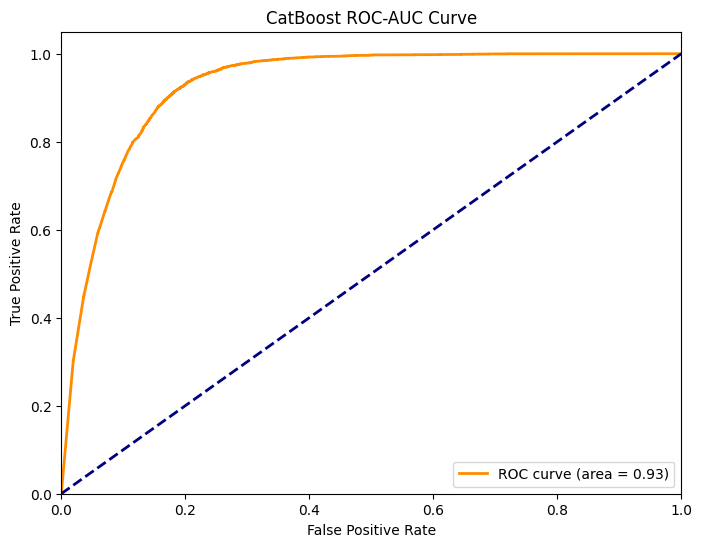

In [ ]:

# Train the best model on your training data
catboost_model.fit(X_train_encoded, y_train)

# Get the predicted probabilities for the positive class
y_pred_prob = catboost_model.predict_proba(X_test_encoded)[:, 1]

# Compute ROC curve and ROC area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('CatBoost ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


**The model is able to accurately predict customer churn based on a variety of features, including customer spending, recharge frequency, phone usage, and ARPU segment. The model could be used by mobile operators to develop targeted marketing campaigns, improve customer service, and improve network planning.**

In [ ]:
# from catboost import CatBoostClassifier

# # Create a CatBoost classifier with the specified hyperparameters
# catboost = CatBoostClassifier(
#     n_estimators=10000,
#     max_depth=6,
#     eval_metric='AUC',
#     reg_lambda=370,
#     task_type="GPU",
#     devices='0:1'
# )

# # Train the model on your training data
# catboost.fit(X_train_encoded, y_train_encoded)

# # Make predictions on the test data
# catboost_pred = catboost.predict(X_test_encoded)

# # Calculate ROC AUC
# catboost_roc_auc = roc_auc_score(y_test_encoded, catboost.predict_proba(X_test_encoded)[:, 1])

# print(f'CatBoost ROC AUC: {catboost_roc_auc:.3f}')


Default metric period is 5 because AUC is/are not implemented for GPU


Streaming output truncated to the last 5000 lines.
5001:	total: 2m 50s	remaining: 2m 50s
5002:	total: 2m 50s	remaining: 2m 50s
5003:	total: 2m 50s	remaining: 2m 50s
5004:	total: 2m 50s	remaining: 2m 50s
5005:	total: 2m 50s	remaining: 2m 50s
5006:	total: 2m 50s	remaining: 2m 50s
5007:	total: 2m 50s	remaining: 2m 49s
5008:	total: 2m 50s	remaining: 2m 49s
5009:	total: 2m 50s	remaining: 2m 49s
5010:	total: 2m 50s	remaining: 2m 49s
5011:	total: 2m 50s	remaining: 2m 49s
5012:	total: 2m 50s	remaining: 2m 49s
5013:	total: 2m 50s	remaining: 2m 49s
5014:	total: 2m 50s	remaining: 2m 49s
5015:	total: 2m 50s	remaining: 2m 49s
5016:	total: 2m 50s	remaining: 2m 49s
5017:	total: 2m 50s	remaining: 2m 49s
5018:	total: 2m 50s	remaining: 2m 49s
5019:	total: 2m 50s	remaining: 2m 49s
5020:	total: 2m 50s	remaining: 2m 49s
5021:	total: 2m 50s	remaining: 2m 49s
5022:	total: 2m 50s	remaining: 2m 49s
5023:	total: 2m 50s	remaining: 2m 49s
5024:	total: 2m 50s	remaining: 2m 49s
5025:	total: 2m 51s	remaining: 2m 49s